In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv("uber.csv")

In [67]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [70]:
df.drop(["Unnamed: 0","key"],axis=1,inplace=True)

KeyError: "['Unnamed: 0' 'key'] not found in axis"

In [ ]:
df.sample()

In [ ]:
df.isnull().sum()

In [ ]:
dropoff_longitude_mean=df["dropoff_longitude"].mean()
dropoff_latitude_mean=df["dropoff_latitude"].mean()

In [ ]:
df["dropoff_longitude"].fillna(dropoff_longitude_mean,inplace=True)
df["dropoff_latitude"].fillna(dropoff_latitude_mean,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()


In [ ]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['year']=df.pickup_datetime.dt.year
df['month']=df.pickup_datetime.dt.month
df['day']=df.pickup_datetime.dt.day
df['weekday']=df.pickup_datetime.dt.weekday

In [ ]:
df.head()

In [ ]:
df.drop("pickup_datetime",axis=1,inplace=True)
df.head()

In [ ]:
sns.boxplot(x=df["pickup_latitude"])
plt.show()

In [ ]:
sns.boxplot(x=df["pickup_longitude"])
plt.show()

In [ ]:
sns.boxplot(x=df["fare_amount"])
plt.show()

In [ ]:
def removeOutliers(df,col):
    Q1=np.percentile(df[col],75)
    Q3=np.percentile(df[col],25)
    IQR=Q3-Q1
    
    LL=Q3-1.5*IQR
    UL=Q1+1.5*IQR
    
    df[col]=np.clip(df[col],LL,UL)
    

In [ ]:
df.columns

In [ ]:
for c in df.columns:
    removeOutliers(df,c)

In [ ]:
sns.boxplot(x=df['fare_amount'])
plt.show()

In [ ]:
sns.boxplot(x=df["pickup_latitude"])
plt.show()

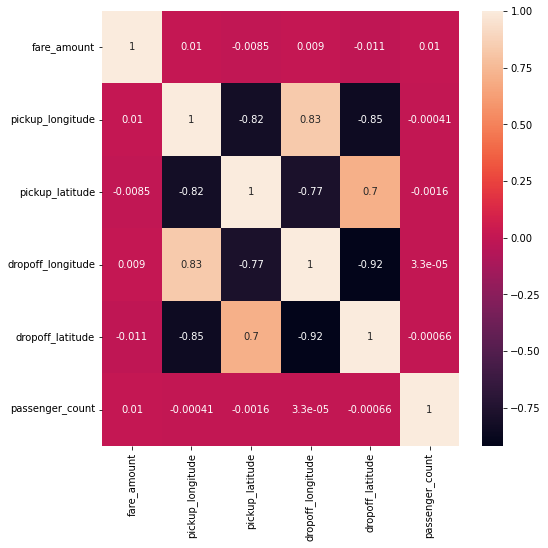

In [71]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [72]:
import haversine as hs

In [73]:
distance=[]
for i in range(len(df['fare_amount'])):
    lat1,lat2,lon1,lon2=df['pickup_latitude'][i],df['dropoff_latitude'][i],df['pickup_longitude'][i],df['dropoff_longitude'][i]
    
    loc1=(lat1,lon1)
    loc2=(lat2,lon2)
    d=hs.haversine(loc1,loc2)
    distance.append(d)

ValueError: Longitude -748.016667 is out of range [-180, 180]

In [ ]:
df['distance']=distance

In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('fare_amount',axis=1)
y=df['fare_amount']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
c=LinearRegression()

In [ ]:
c.fit(xtrain,ytrain)

In [ ]:
ypredict=c.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(ytest,ypredict))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(np.sqrt(mean_squared_error(ytest,ypredict)))

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf=RandomForestRegressor()

In [82]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [83]:
ypredict=rf.predict(xtest)

In [84]:
print(r2_score(ytest,ypredict))
print(np.sqrt(mean_squared_error(ytest,ypredict)))

0.6927362290837662
2.2171083502879285
